## Objective 

This analysis aims to unearth significant predictors of insurance costs and understand the demographic and health-related characteristics that most influence premium pricing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("insurance.xlsx")

## High level overview of the dataset

#### Inspect the first few rows of dataset

In [11]:
data.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


In [3]:
data1=pd.read_excel("insurance.xlsx")

#### Get basic info of  dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


**Insight:**
- There are no missing values in the dataset
- We will create a new column to distinguish each row as a different customer . 
- 'Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies','HistoryOfCancerInFamily'   columns are categorical in nature having only two value 0 or 1 .

In [4]:
#Creating a new feature to reflect a different customer.
data.insert(0,"Customers", ["C"+str(i) for i in range(1,987)])

In [5]:
data["Height"]= data["Height"]/100

In [6]:
BMI= round(data["Weight"]/(data["Height"]**2) ,1)
data.insert(8,"BMI", BMI)

In [7]:
dataX=  data[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'BMI' , 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

datay= data["PremiumPrice"]

In [10]:
data.head()

,Customers,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,C1,45,0,0,0,0,1.55,57,23.7,0,0,0,25000
1,C2,60,1,0,0,0,1.80,73,22.5,0,0,0,29000
2,C3,36,1,1,0,0,1.58,59,23.6,0,0,1,23000
3,C4,52,1,1,0,1,1.83,93,27.8,0,0,2,28000
4,C5,38,0,0,0,1,1.66,88,31.9,0,0,1,23000


In [11]:
data.shape

(986, 13)

Datatypes are assigned correctly no changes requried

#### Checking for missing values

In [12]:
data.isnull().sum()

Customers                  0
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
BMI                        0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

**Insight:**
- There are no missing values in the dataset.

## Summary statistics

In [22]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customers,986,986,C1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,986.0,NaN,NaN,NaN,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,NaN,NaN,NaN,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,NaN,NaN,NaN,0.46856,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,NaN,NaN,NaN,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,NaN,NaN,NaN,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,NaN,NaN,NaN,1.681826,0.100982,1.45,1.61,1.68,1.76,1.88
Weight,986.0,NaN,NaN,NaN,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
BMI,986.0,NaN,NaN,NaN,27.460041,5.879494,15.2,23.4,27.2,30.8,50.0
KnownAllergies,986.0,NaN,NaN,NaN,0.21501,0.411038,0.0,0.0,0.0,0.0,1.0


**Insights**
- There are 213451 unique users in the train dataset
- The most frequent gender type in the dataset is "unknown" we can replace it with NA
- The mean age of the users is roughly 50 years we can also see some outliers where the max age is 2014
- The most frequent signup method was basic type and in total we have 3 different sign up methods
- There are in total 25 unique langauges in the dataset with english being the most frequent one
- There are in total 8 unique affiliate channels of which direct is the most frequent one
- There are in total 18 unique affiliate providers of which direct is the most frequent one
- There are 4 unique sing up app of which web is the most frequent one
- There are in total 9 unique first device types of which Mac desktop is the most frequent used
- There are 52 unique first browsers in the dataset of which chrome is the most used
- And 12 country destinations of which NDF is the most common which means that many users haven't booked any trip.

##  EDA

In [7]:
a=data[data["BloodPressureProblems"]==1]
b=data[data["Diabetes"]==1]
c=data[data["AnyTransplants"]==1]
d=data[data["AnyChronicDiseases"]==1]
e=data[data["KnownAllergies"]==1]
f=data[data["HistoryOfCancerInFamily"]==1]


In [8]:
a["BloodPressureProblems"]="BloodPressure"
b["Diabetes"]="Diabetes"
c["TransplantsDone"]="TransplantsDone"
d["ChronicDiseases"]="ChronicDiseases"
e["KnownAllergies"]="KnownAllergies"
f["HistoryOfCancerInFamily"]="HistoryOfCancerInFamily"

In [16]:
HealthProblems=pd.concat([a["BloodPressureProblems"],b["Diabetes"],c["TransplantsDone"],d["ChronicDiseases"]
                          ,e["KnownAllergies"],f["HistoryOfCancerInFamily"]] , ignore_index=True)

In [17]:
HealthProblems=pd.DataFrame({"Problems" : HealthProblems})


In [18]:
HealthProblems.head()

,Problems
0,BloodPressure
1,BloodPressure
2,BloodPressure
3,BloodPressure
4,BloodPressure


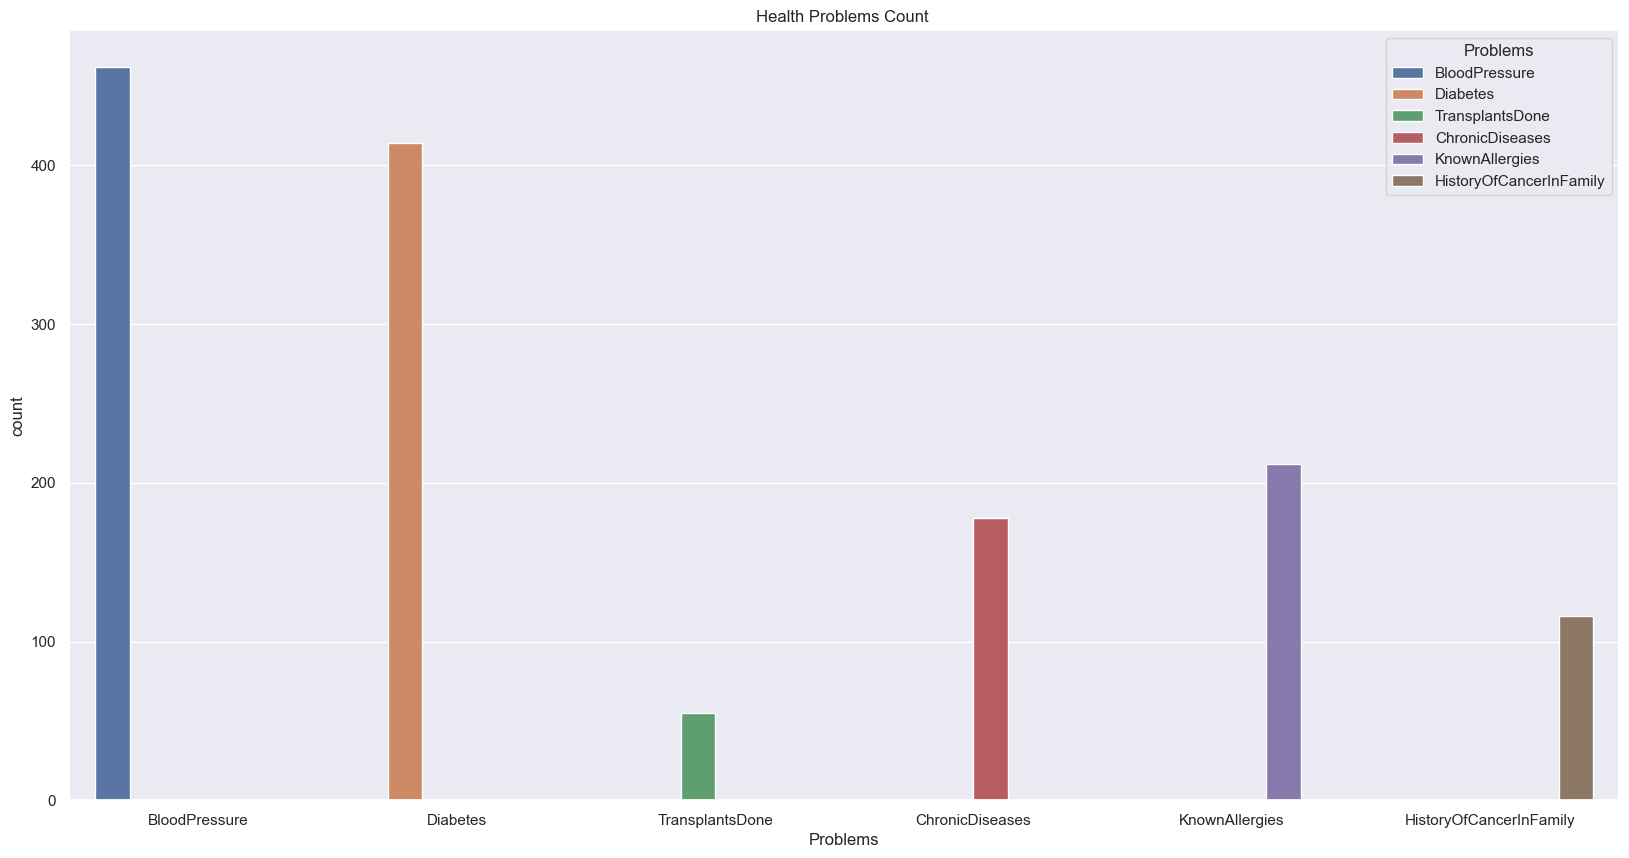

In [19]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot( data=HealthProblems,x="Problems",hue="Problems")

plt.title("Health Problems Count ")

plt.show()

**Insights**
- The Dataset is highly Imbalanced.
- Majority of customers have Diabetes and Blood Pressure problems.

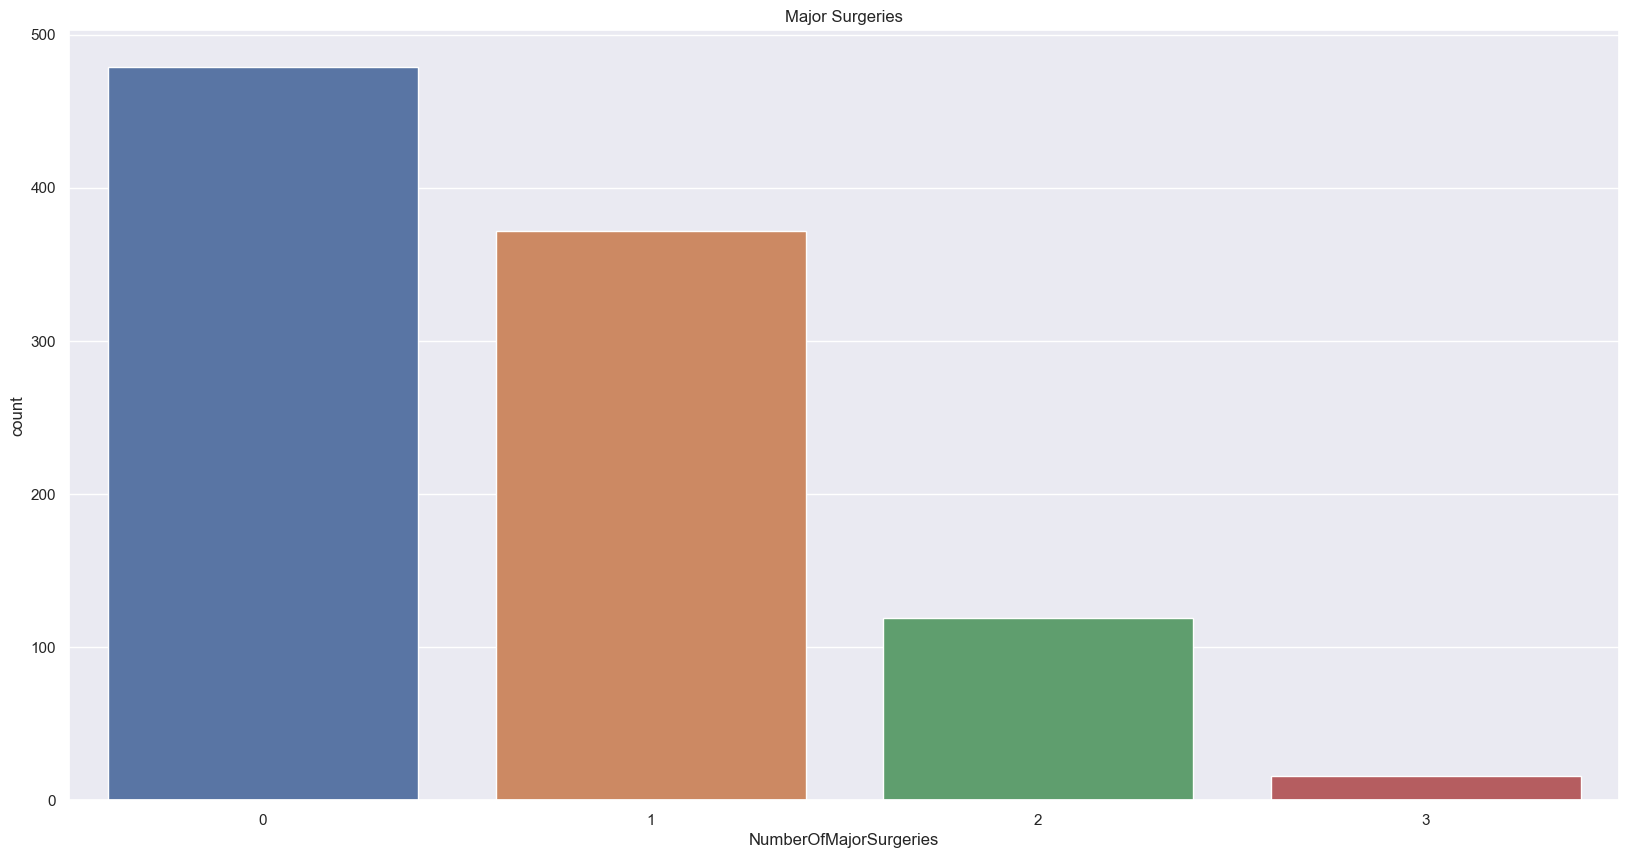

In [20]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="NumberOfMajorSurgeries", data=data)

plt.title("Major Surgeries")

plt.show()

**Insight**
- Majority of Customers either have 0 or 1 Major Surgery with 0 being the majority.
- Customers with 3 Major surgeries are very less.

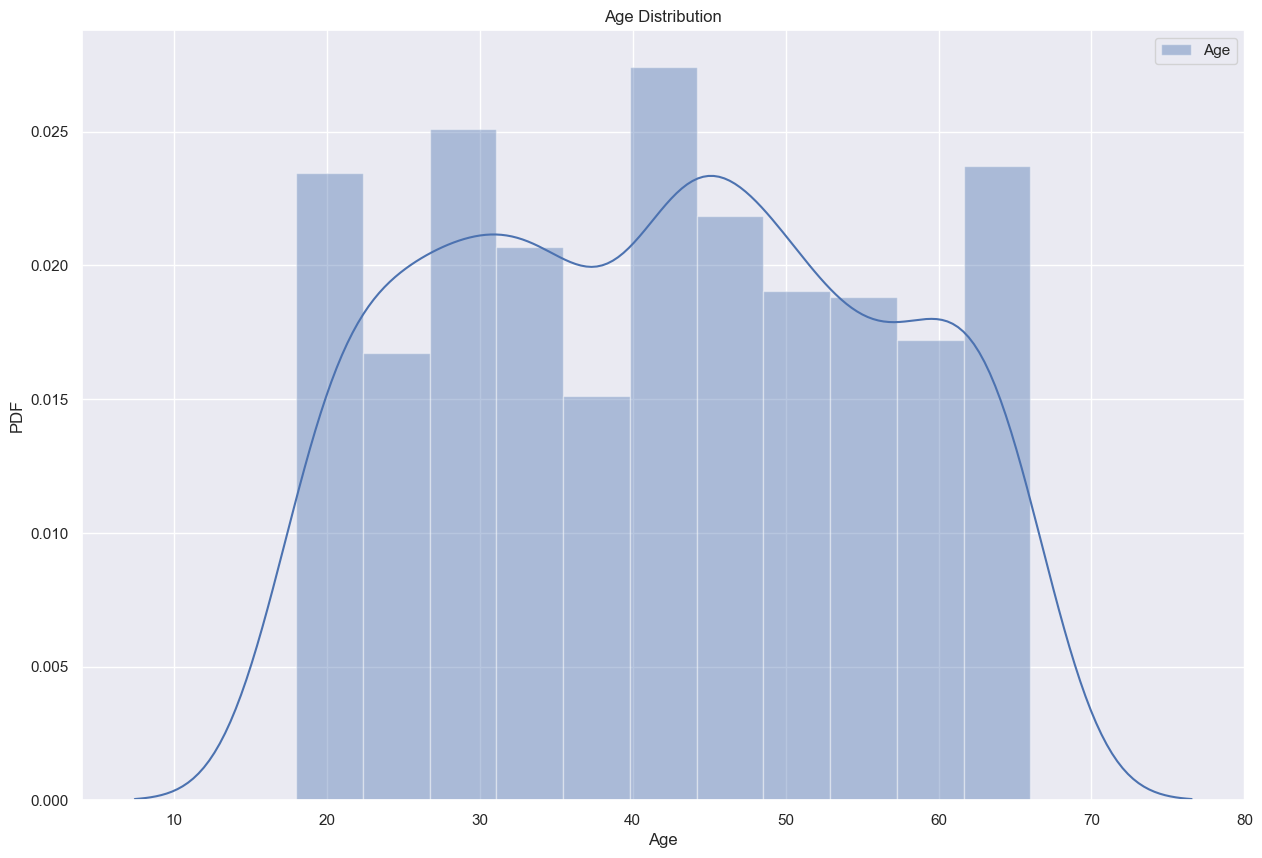

In [32]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(data['Age'],label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

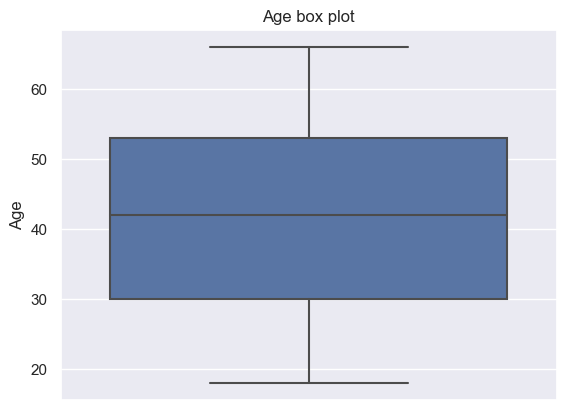

In [33]:
sns.boxplot(y='Age',data=data)

plt.title("Age box plot")

plt.show()

In [19]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(data['Age'],i)))

0 percentile value is 18.0
10 percentile value is 22.0
20 percentile value is 27.0
30 percentile value is 32.0
40 percentile value is 37.0
50 percentile value is 42.0
60 percentile value is 46.0
70 percentile value is 50.5
80 percentile value is 56.0
90 percentile value is 62.0
100 percentile value is 66.0


In [20]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(data['Age'].dropna(),i)))

90 percentile value is 62.0
91 percentile value is 62.0
92 percentile value is 63.0
93 percentile value is 63.0
94 percentile value is 64.0
95 percentile value is 64.0
96 percentile value is 64.59999999999991
97 percentile value is 65.0
98 percentile value is 66.0
99 percentile value is 66.0
100 percentile value is 66.0


In [21]:
#calculating 0-10th percentile to find a the correct percentile value for removal of outliers

for i in range(0,11,1):

    print("{} percentile value is {}".format(i,np.percentile(data['Age'].dropna(),i)))

0 percentile value is 18.0
1 percentile value is 18.0
2 percentile value is 18.0
3 percentile value is 19.0
4 percentile value is 19.0
5 percentile value is 20.0
6 percentile value is 20.0
7 percentile value is 21.0
8 percentile value is 21.0
9 percentile value is 22.0
10 percentile value is 22.0


In [27]:
# median replacement with median age = 42.0

def age_median(age):

    """
    Function to replace age outliers with median age

    parameters: age

    returns : age

    """

    if age < 22.0 or age > 66.0:

        return 42.0

    else:

        return age

In [28]:
data['Age'] = data['Age'].apply(age_median)

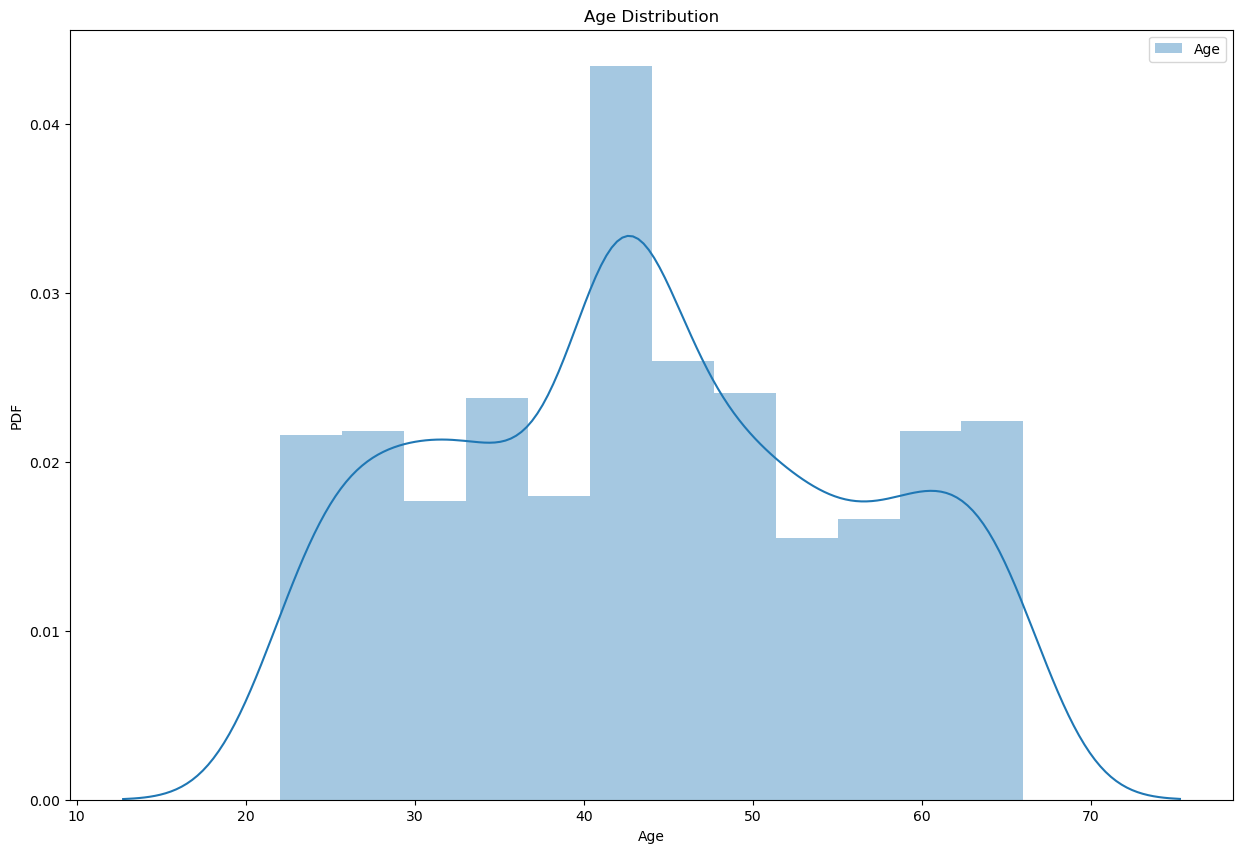

In [29]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(data['Age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

outliers removed , most ages concentrated bw 20-40 with median age = 34

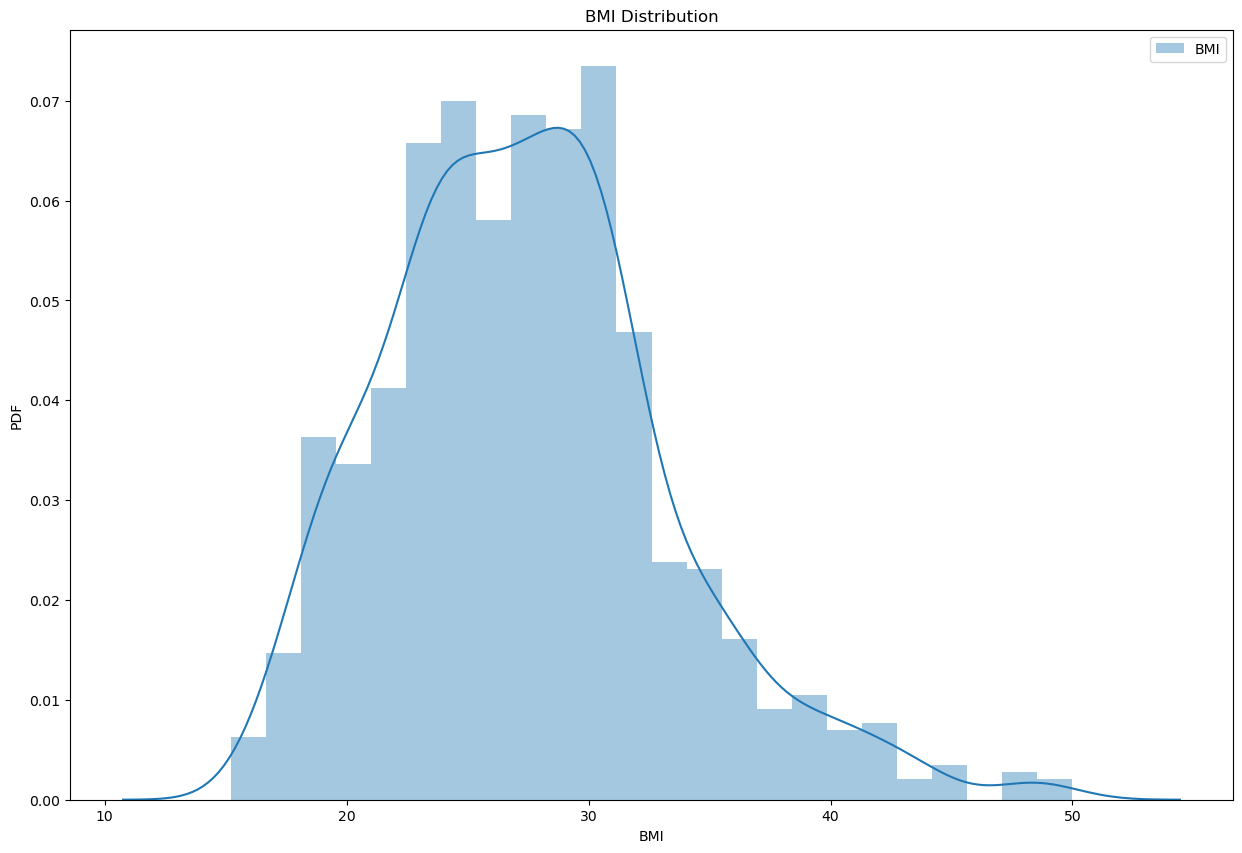

In [13]:


# BMI distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(data['BMI'],label="BMI")

ax.set_title('BMI Distribution')

ax.set(xlabel='BMI', ylabel='PDF')

plt.legend()

plt.show()

**Insight**
- Most accounts created in May and June.
- Least no of accounts are created in October,November and December.

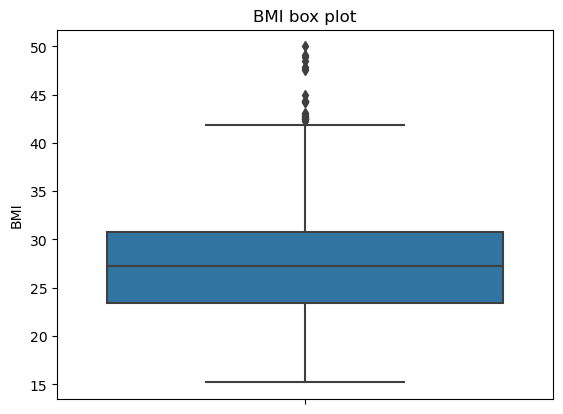

In [14]:
sns.boxplot(y='BMI',data=data)

plt.title("BMI box plot")

plt.show()

In [27]:
data1=data1.to_numpy()
data1

array([[   45,     0,     0, ...,     0,     0, 25000],
       [   60,     1,     0, ...,     0,     0, 29000],
       [   36,     1,     1, ...,     0,     1, 23000],
       ...,
       [   56,     0,     1, ...,     0,     1, 29000],
       [   47,     1,     1, ...,     0,     1, 39000],
       [   21,     0,     0, ...,     0,     1, 15000]], dtype=int64)

In [30]:
cov_matrix= np.cov(data1)

In [31]:
cov_matrix.shape

(986, 986)

## Hypothesis testing

**Hypothesis 1:** Being a Diabetic affects the  Premium Paid by customer.

- Null Hypothesis (H0): Premium paid by both Diabetic and non diabetic customers are the same .
- Alternative Hypothesis (H1): Premium paid by  Diabetic customer is more than non diabetic customers .

In [8]:
data.groupby(["Diabetes"])["PremiumPrice"].mean()

Diabetes
0    23931.818182
1    24896.135266
Name: PremiumPrice, dtype: float64

In [9]:
dia_prem= data.loc[data["Diabetes"]==1 , "PremiumPrice"]
nondia_prem= data.loc[data["Diabetes"]==0 , "PremiumPrice"]

In [12]:
from scipy.stats import ttest_ind



# Performing 2 sample T-test
t_stat , p_value = ttest_ind(nondia_prem , dia_prem ,alternative="less")

print(f'T-test test statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value <0.05:
    print("Diabetc customers pay more premium as compared to Non-Diabetic customers")
else:
    print("Premium Paid by both Diabetic and non diabetic customers is the same ")

T-test test statistic: -2.3975629574233563
p-value: 0.008345045692653055
Diabetc customers pay more premium as compared to Non-Diabetic customers


**Inference:**
The extremely low p-value (much less than 0.05) suggests that there is a statistically significant association between the customer being diabetic and the Premium paid by him . This means that diabetic customers pay higher premium compared to non diabetic customers.

**Hypothesis 2:** Having transplants affects the premium prices .

- Null Hypothesis (H0): Having a  Transplant has no effect on th Premium prices paid.
- Alternative Hypothesis (H1): Premium Prices  paid by customers who have had a transplant are more.

In [13]:
data.groupby(["AnyTransplants"])["PremiumPrice"].mean()

AnyTransplants
0    23897.959184
1    31763.636364
Name: PremiumPrice, dtype: float64

In [14]:
trans_prem= data.loc[data["AnyTransplants"]==1 , "PremiumPrice"]
nontrans_prem= data.loc[data["AnyTransplants"]==0 , "PremiumPrice"]

In [15]:
# # Create a contingency table
# contingency_table_device = pd.crosstab(train_df['first_device_type'], train_df['country_destination'])

# # Perform chi-square test
# chi2_device, p_device, dof_device, expected_device = chi2_contingency(contingency_table_device)

# Performing 2 sample T-test
t_stat , p_value = ttest_ind(nontrans_prem , trans_prem ,alternative="less")

print(f'T-test test statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value <0.05:
    print("Customers who have had any transplant pay more premium as compared to Customers who never had any Transplant")
else:
    print("There is no significat difference in the premium paid by customers who have had any transplant compared to those who haven't .  ")

T-test test statistic: -9.471654448151899
p-value: 9.893647711816388e-21
Customers who have had any transplant pay more premium as compared to Customers who never had any Transplant


**Inference:**
The p-value of 0.0 (extremely less than 0.05) indicates a very strong statistically significant relationship between the AnyTransplants column and Premium Price column. This suggests that the Customers who have had any transplant pay more premium as compared to Customers who never had any Transplant.

**Hypothesis 3:** Having History of Cancer in Family affects the premium prices .

- Null Hypothesis (H0): Having a history of Cancer In Family has no effect on th Premium prices paid.
- Alternative Hypothesis (H1): Premium Prices  paid by customers who have had a history of cancer in family are more.

In [34]:
data.groupby(["HistoryOfCancerInFamily"])["PremiumPrice"].mean()

HistoryOfCancerInFamily
0    24147.126437
1    25758.620690
Name: PremiumPrice, dtype: float64

In [35]:
Canc_prem= data.loc[data["HistoryOfCancerInFamily"]==1 , "PremiumPrice"]
nocan_prem= data.loc[data["HistoryOfCancerInFamily"]==0 , "PremiumPrice"]

In [36]:
# Performing 2 sample T-test
t_stat , p_value = ttest_ind(nocan_prem , Canc_prem ,alternative="less")

print(f'T-test test statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value <0.05:
    print("Customers who have a history of cancer in their family pay more premium as compared to Customers who don't")
else:
    print("There is no significat difference in the premium paid by customers with a history of cancer in family than those who don't.  ")

T-test test statistic: -2.617041984412821
p-value: 0.004502793655223513
Customers who have a history of cancer in their family pay more premium as compared to Customers who don't


**Inference:**
The p-value of 0.0045 (way less than 0.05) indicates a very strong statistically significant relationship between the HistoryOfCancerInFamily column and Premium Price column. This suggests that the Customers who have had a history of Cancer In family pay more premium as compared to Customers who don't.

**Hypothesis 4:** Having Blood Pressure Problems affects the premium prices .

- Null Hypothesis (H0): Having Blood Pressure has no effect on th Premium prices paid.
- Alternative Hypothesis (H1): Premium Prices  paid by customers who have Blood Pressure Problems are more.

In [39]:
data.groupby(["BloodPressureProblems"])["PremiumPrice"].mean()

BloodPressureProblems
0    23356.870229
1    25448.051948
Name: PremiumPrice, dtype: float64

In [40]:
BP_prem= data.loc[data["BloodPressureProblems"]==1 , "PremiumPrice"]
noBP_prem= data.loc[data["BloodPressureProblems"]==0 , "PremiumPrice"]

In [41]:
# Performing 2 sample T-test
t_stat , p_value = ttest_ind(noBP_prem , BP_prem ,alternative="less")

print(f'T-test test statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value <0.05:
    print("Customers who have a Blood Pressure Problems pay more premium as compared to Customers who don't")
else:
    print("There is no significat difference in the premium paid by customers with a Blood Pressure Problems than those who don't.  ")

T-test test statistic: -5.316365561489142
p-value: 6.550248545360963e-08
Customers who have a Blood Pressure Problems pay more premium as compared to Customers who don't


**Hypothesis 5:** Presence of Chronic Diseases indicates to the history of cancer in family .

- Null Hypothesis (H0): Presence of chronic diseases has no association with the history of cancer in family .
- Alternative Hypothesis (H1):  Presence of chronic diseases has  association with the history of cancer in family .

In [44]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(data['AnyChronicDiseases'], data['HistoryOfCancerInFamily'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'chisquare test statistic: {chi2}')
print(f'p-value: {p_value}')

chisquare test statistic: 0.02062393388215223
p-value: 6.550248545360963e-08


**Inference:**
The extremely low p-value (much less than 0.05) suggests that there is a statistically significant association between the presence of chronic diseases and the history of cancer in family. 

**Hypothesis 6:** There is a significant difference in the average PremiumPrice Of Customers with different number of major surgeries.

- Null Hypothesis (H0): The average premium price of customers users by different number of major surgeries.
- Alternative Hypothesis (H1): The average premium price differs by number of major surgeries.

Since we have one numerical dependent variable age and an independent categorical feature with more than 2 categories one way ANOVA is what we'll use to test the hypothesis but to implement the One-way ANOVA test, we need to make sure that they are satisfying certain conditions:

1. Data should be normally distributed (i.e, Gaussian)

2. Data should be independent across each record

3. Equal variance in different groups

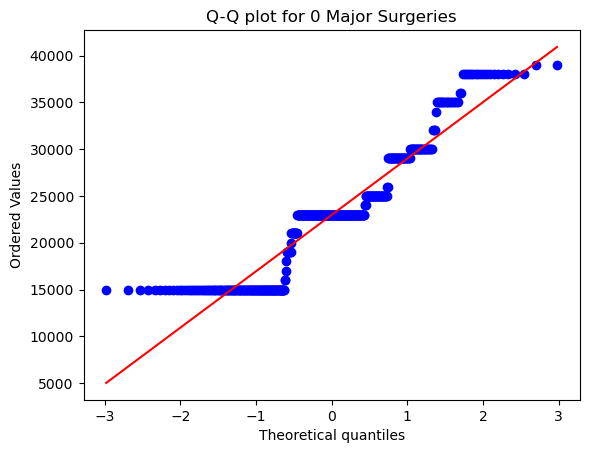

Shapiro-Wilk test for 0 Major Surgeries: W=0.8885378837585449, p-value=3.900849351950539e-18


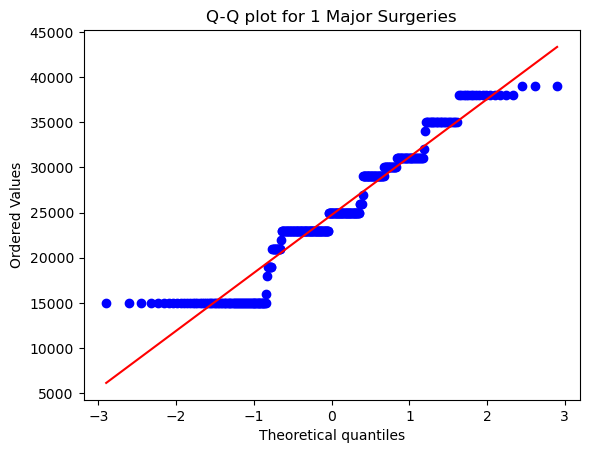

Shapiro-Wilk test for 1 Major Surgeries: W=0.9308931827545166, p-value=4.195002852036556e-12


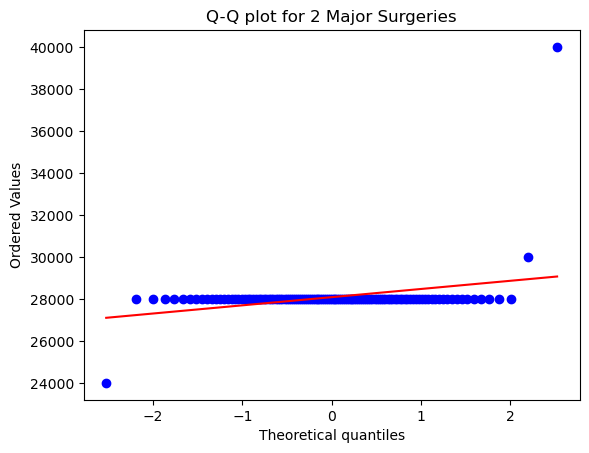

Shapiro-Wilk test for 2 Major Surgeries: W=0.12415271997451782, p-value=1.809075307965078e-23


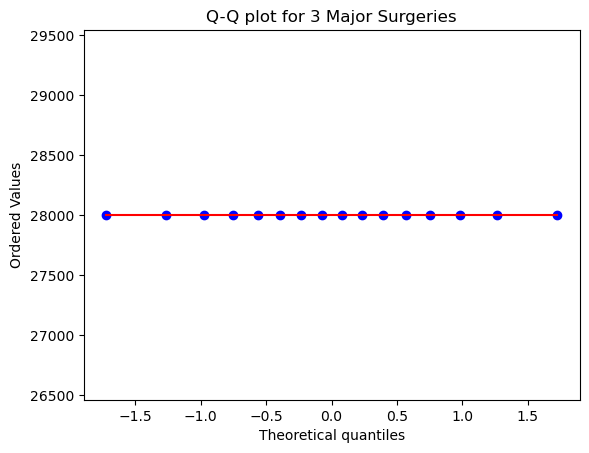

Shapiro-Wilk test for 3 Major Surgeries: W=1.0, p-value=1.0


In [8]:
import scipy.stats as stats

# Hypothesis 3 data extraction
df_hypothesis3 = data[['PremiumPrice', 'NumberOfMajorSurgeries']]

# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in data['NumberOfMajorSurgeries'].unique():
    surgeries_data = data[data['NumberOfMajorSurgeries'] == i]['PremiumPrice']
    stats.probplot(surgeries_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i} Major Surgeries')
    plt.show()
    shapiro_test = stats.shapiro(surgeries_data)
    print(f'Shapiro-Wilk test for {i} Major Surgeries: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

If we look at the Q-Q plots and the p values from the Shapiro-Wilk test for each number of surgery we can see that the the data does not follows the normality assumption except for when number of surgeries are 3 .

In [9]:
# Check for homogeneity of variances using Levene's test
levene_test = stats.levene(*[data[data['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in data['NumberOfMajorSurgeries'].unique()])
print(f"Levene's test for homogeneity of variances: W={levene_test.statistic}, p-value={levene_test.pvalue}")

Levene's test for homogeneity of variances: W=57.30177805975256, p-value=3.877645981882467e-34


We can see from the Levene's test that the p-values is 0.00 which is very less than 0.05 which indicates that the variaince significantly differes acorss each destination.

We can see that both the asusmptions of the ANOVA test are not met and hence we'll use the KS test for this hypothesis

In [10]:
# Perform KS test for each pair of number of major surgeries . 
sur_data = data['NumberOfMajorSurgeries'].unique() # Get unique country destinations
ks_test_results = {}

for i, sur_data1 in enumerate(sur_data):
    for j, sur_data2 in enumerate(sur_data):
        if i < j:
            data1 = data[data['NumberOfMajorSurgeries'] == sur_data1]['PremiumPrice'] # PremiumPrice for sur_data1
            data2 = data[data['NumberOfMajorSurgeries'] == sur_data2]['PremiumPrice'] # PremiumPrices for sur_data2
            ks_test = stats.ks_2samp(data1, data2) #perform KS test
            ks_test_results[f"{sur_data1} Surgeries vs {sur_data2} Surgeries"] = (ks_test.statistic, ks_test.pvalue)

# Print KS test results
for pair, result in ks_test_results.items():
    print(f"KS test result for {pair}: D={result[0]}, p-value={result[1]}")

KS test result for 0 Surgeries vs 1 Surgeries: D=0.19045053538958853, p-value=3.975885823112823e-07
KS test result for 0 Surgeries vs 2 Surgeries: D=0.7640392273819757, p-value=1.7050094408873255e-56
KS test result for 0 Surgeries vs 3 Surgeries: D=0.7724425887265136, p-value=4.102491386920854e-10
KS test result for 1 Surgeries vs 2 Surgeries: D=0.6475106171500858, p-value=1.586610474145929e-36
KS test result for 1 Surgeries vs 3 Surgeries: D=0.6559139784946236, p-value=5.827768464361586e-07
KS test result for 2 Surgeries vs 3 Surgeries: D=0.01680672268907563, p-value=1.0


**Interpretation and Insights**

**General Insights:**

- Most comparisons have significant differences: This suggests that for most pairs of different number of surgeries, the Premium Price distributions of Customers having those number of surgeries are significantly different.
- One pair have no significant differences: For example, 2 Surgeries vs. 3 surgeries have p-values greater than 0.05, indicating no significant difference in Premium Price distributions.

**Specific Patterns:**

- Number of Major Surgeries 2: Shows significant differences with almost all other number of surgeries, indicating that the Premium Price distribution for 2 surgeries is quite distinct.
